### Exploring Determinants of Healthcare Expenditures and Outcomes: A Data-Driven Analysis

**Introduction and Background**

**Motivation**

In the aftermath of a global health crisis that swept nearly 7% of the world’s population, healthcare has become an urgent and crucial topic. The unprecedented impact of the pandemic has further highlighted the importance of understanding healthcare expenditures and their implications for both the economy and public health. The data from the Medical Expenditure Panel Survey (MEPS), offers extensive information on healthcare utilization, expenditures, and demographic variables, this study aims to uncover critical insights into the factors that drive healthcare costs and outcomes.

Healthcare expenditures are a key determinant of both national economic stability and individual well-being. A thorough understanding of the factors influencing healthcare costs and health outcomes is essential, as it can inform policy decisions, shape healthcare reforms, and guide the allocation of resources. This research seeks to explore the complex relationships between various demographic, behavioral, and regional factors, and their influence on healthcare expenditures and health outcomes. Through statistical analysis, the study aims to identify the primary drivers of healthcare costs and highlight disparities in access to care across different population groups.

**Relevance and Background**

The US has witnessed continuous growth in health expenditure due to demographic changes like the aging of the population and increasing prevalence of chronic diseases. But these costs are not equitably distributed across all groups of the population. Various sources has indicated the presence of inequalities in the access to and utilization of health services by people, which is determined by their levels of income, education, and insurance status.

The dataset used for this analysis comes from the Medical Expenditure Panel Survey (MEPS), an outstanding source that provides comprehensive information on healthcare use, spending patterns, and demographic variables. MEPS data, collected through household interviews, provide observational insights into real-world healthcare access and expenditure behaviors across a diverse range of socioeconomic and demographic groups. This study aims to utilize these insights to offer a deeper understanding of healthcare spending dynamics and the underlying factors that contribute to disparities in healthcare access and outcomes.


**Questions I Aim to Answer Through This Project:**

1. Smoking Habits and Prescription Expenditures

Question: Do individuals who smoke every day spend a higher proportion of their total healthcare expenditures on prescription medications compared to non-smokers?

Intuitive Answer: Smokers are more likely to develop chronic conditions requiring medication, so we expect smokers to spend a higher proportion on prescription expenditures.

2. Age of Diagnosis and Total Healthcare Expenditures

Question: Does the age of diagnosis for chronic conditions (e.g., diabetes or hypertension) impact total healthcare expenditures?

Intuitive Answer: Earlier diagnosis may lead to higher long-term costs due to prolonged disease management, while later diagnosis may involve acute treatment costs.

3. Income and Healthcare Expenditures (Diabetes and Hypertension)

Question: Does income level significantly impact total healthcare expenditures for individuals diagnosed with chronic conditions?

Intuitive Answer: Higher-income individuals may spend more due to better access to healthcare resources, while lower-income individuals might incur emergency-related costs.

4. COVID Vaccination and Total Healthcare Expenditures

Question: Does receiving a COVID-19 vaccine affect total healthcare expenditures?

Intuitive Answer: Vaccination may reduce expenditures by preventing severe illness, but no significant difference is expected for those who did not contract COVID-19.

5. Income and Healthcare Prioritization (Essential vs. Discretionary Care)

Question: Do income groups differ in their allocation of healthcare expenditures to essential (e.g., prescriptions) versus discretionary (e.g., dental care) services?

Intuitive Answer: Lower-income individuals may prioritize essential care due to necessity, while higher-income individuals might allocate more to discretionary services.

6. Chronic Conditions and Healthcare Outcomes

Question: Do individuals with multiple chronic conditions incur higher healthcare expenditures and miss more workdays compared to those with single or no chronic conditions?

Intuitive Answer: Managing multiple chronic conditions likely leads to higher costs and more frequent work absences due to complications and treatment needs.


**Methods and Results**  

**Dataset Description and Filtering**  
The dataset `combined_meps_data.csv` is a consolidated dataset derived by combining the Medical Expenditure Panel Survey (MEPS) data from 2018 to 2022. To ensure meaningful and targeted analysis, we focus on individuals aged 18 to 64. Specific columns relevant to healthcare expenditures, demographics, health indicators, and COVID-19 factors have been selectively included to create this comprehensive resource for analysis:  

1. **Healthcare Expenditures**: Total expenditures, self-pay amounts, and prescription costs.  
2. **Demographics**: Age, gender, family income, education level, region.  
3. **Health Indicators**: General health status, hypertension and asthma diagnoses, smoking status.  
4. **Employment and Insurance**: Employment status, health insurance coverage from the employer.  
5. **COVID-19 Factors**: Vaccination and booster shot status.  

This age range was selected for several reasons:

1. Avoidance of Outliers: Including children and older adults introduces variability due to unique healthcare needs, such as pediatric care or Medicare/Medicaid coverage, which differ significantly from the general population.

2. Policy Implications: Adults aged 18 to 64 typically fall outside Medicaid and Medicare coverage, making their healthcare expenditures more indicative of employer-based insurance systems or out-of-pocket spending.

3. Data Relevance: The selected age group ensures the results are not skewed by extreme age-specific healthcare costs, allowing for more accurate insights into the determinants of healthcare expenditures and outcomes for working-age adults.

By applying this filter, we eliminate confounding variables related to children and older adults, enabling a focused analysis on factors such as income disparities, smoking habits, and the impact of chronic conditions.

**Exploratory Data Analysis (EDA) and Preprocessing**  

**Data Cleaning and Preprocessing**  
Before applying statistical methods, cleaning is done to handle missing values and standardization of variables. The following steps are performed:  

1. **Handling Missing Data**: Missing values are addressed using imputation techniques: mean substitution for numerical variables and removing rows with empty values.  
2. **Data Transformation**: Variables are standardized as needed, and converting the categorical variables which were encoded to its corresponding values so to have a meaning out of the data and also using the encoded data for statistical analysis (e.g., 0 represents "no insurance," and 1 represents "insured").  

**Exploratory Data Analysis**  
EDA techniques consist of summary statistics, data visualization, and correlation analysis. The following aspects of the data are examined:  

1. **Distribution of Healthcare Expenditures**: Visualizations like histograms, box plots, and bar charts illustrate the distribution of total expenditures, self-pay amounts, and prescription costs.  
2. **Correlation Analysis**: Pearson's correlation coefficient is used to explore pairwise correlations between key variables such as age, family income, healthcare expenditures, and health status.  

**Overall Summary Statistics For Selected Variables**

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Select variables of interest
variables_of_interest = [
    'How_Often_Smoke_Cigarettes', 'Total_Expenditures', 'Total_Prescription_Expenditures',
    'Family_Income', 'Age_of_Diabetes_Diagnosis', 'Age_of_High_Blood_Pressure_Diagnosis',
    'COVID_Vaccine', 'Dental_Care_Expenditures', 'Days_Missed_Work'
]

data = data[variables_of_interest]

# Define a function to calculate summary statistics
def calculate_statistics(df, variable):
    return {
        'mean': df[variable].mean(),
        'median': df[variable].median(),
        'mode': df[variable].mode()[0] if not df[variable].mode().empty else np.nan,
        'std': df[variable].std(),
        'min': df[variable].min(),
        '25%': df[variable].quantile(0.25),
        '50% (median)': df[variable].quantile(0.50),
        '75%': df[variable].quantile(0.75),
        'max': df[variable].max(),
    }

# Prepare the overall summary statistics
overall_summary = []
for variable in variables_of_interest:
    if variable in data.columns:
        stats = calculate_statistics(data, variable)
        stats['Variable'] = variable
        overall_summary.append(stats)

# Convert to DataFrame
overall_summary_df = pd.DataFrame(overall_summary)

# Reorder columns for better readability
columns_order = ['Variable', 'mean', 'median', 'mode', 'std', 'min', '25%', '50% (median)', '75%', 'max']
overall_summary_df = overall_summary_df[columns_order]

# Set 'Variable' as the index for easier navigation
overall_summary_df.set_index('Variable', inplace=True)

# Display the table
from IPython.display import display
display(overall_summary_df)

# Save to CSV for further use
overall_summary_df.to_csv('overall_summary_statistics.csv', index=True)


,mean,median,mode,std,min,25%,50% (median),75%,max
Variable,,,,,,,,,
How_Often_Smoke_Cigarettes,2.677983,3.0,3.0,0.958910,-15.0,3.0,3.0,3.0,3.0
Total_Expenditures,6351.690443,1194.0,0.0,22095.030310,0.0,173.0,1194.0,4686.0,2187290.0
Total_Prescription_Expenditures,1599.276422,23.0,0.0,13939.961324,0.0,0.0,23.0,345.0,2166701.0
Family_Income,85912.669054,65576.0,0.0,75805.506803,-309948.0,32068.0,65576.0,118133.0,682344.0
Age_of_Diabetes_Diagnosis,2.820404,-1.0,-1.0,12.785226,-8.0,-1.0,-1.0,-1.0,64.0
Age_of_High_Blood_Pressure_Diagnosis,9.352096,-1.0,-1.0,18.833701,-8.0,-1.0,-1.0,14.0,65.0
COVID_Vaccine,-0.505143,-1.0,-1.0,0.993143,-8.0,-1.0,-1.0,-1.0,2.0
Dental_Care_Expenditures,312.957002,0.0,0.0,1095.799685,0.0,0.0,0.0,204.0,39000.0
Days_Missed_Work,3.188559,0.0,0.0,10.117515,-8.0,0.0,0.0,2.0,90.0


The exploratory data analysis highlights some interesting patterns. Most people in the dataset report not smoking, with very few smoking regularly. When it comes to healthcare expenditures, there's a large skew, with most individuals spending relatively little, but a small number of outliers incurring extremely high costs. Prescription spending follows a similar trend, where most individuals spend only a small amount, while a few have significantly higher expenditures. Family income shows considerable variation, with some extreme outliers, and many individuals have missing or unreported data, especially concerning chronic conditions like diabetes and hypertension. A large portion of people are recorded as unvaccinated for COVID, with some errors or missing data. For dental care, most people spend very little, but a few incur much higher costs. Finally, while the majority of individuals miss few or no workdays, there are a small number of people with substantial absences. Overall, the data shows a lot of variability and missing information, particularly in health-related aspects.

**Correlation HeatMap for all the variables we are utilizing for our analysis:**

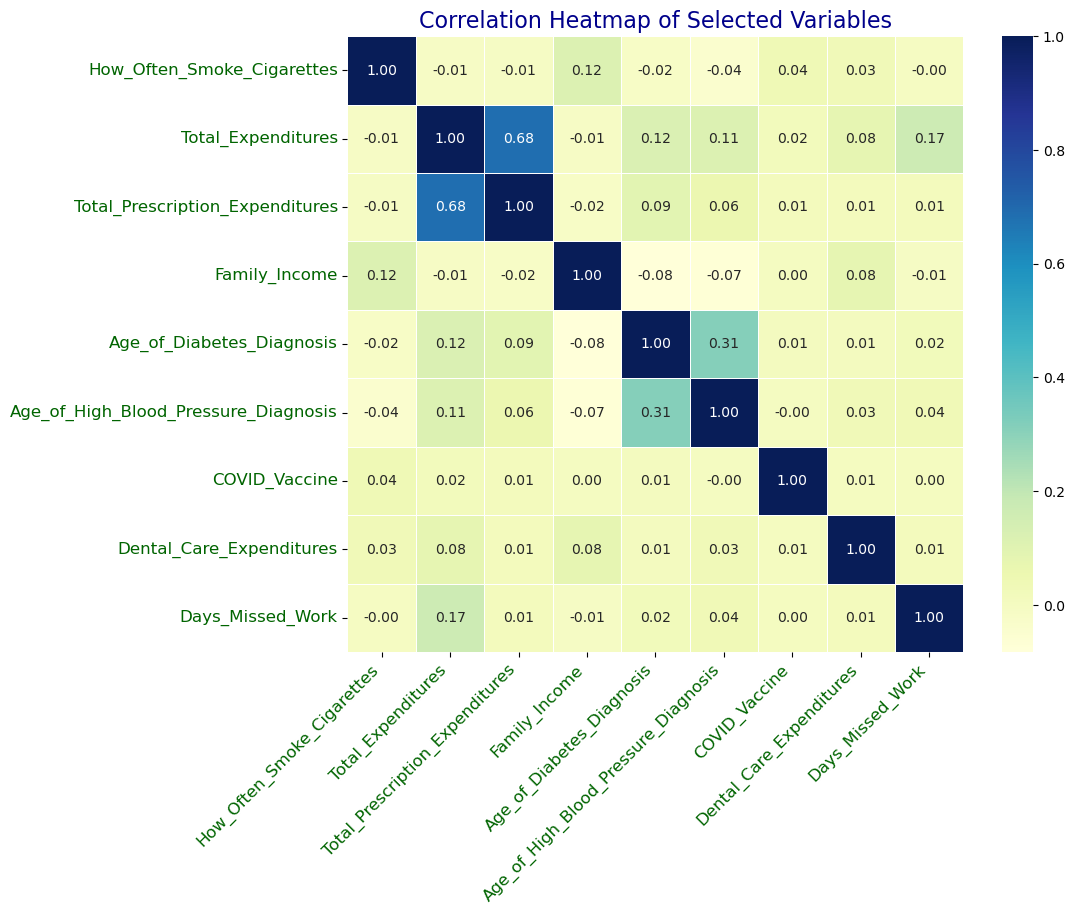

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Select variables relevant to hypotheses
correlation_data = data[
    [
    'How_Often_Smoke_Cigarettes',
    'Total_Expenditures',
    'Total_Prescription_Expenditures',
    'Family_Income',
    'Age_of_Diabetes_Diagnosis',
    'Age_of_High_Blood_Pressure_Diagnosis',
    'COVID_Vaccine',
    'Dental_Care_Expenditures',
    'Days_Missed_Work',
    ]
]

# Drop rows with missing or non-numeric values to compute correlations accurately
correlation_data = correlation_data.dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap with a softer color palette
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu",  # Softer palette with yellows, greens, and blues
    cbar=True, 
    square=True,
    linewidths=0.5,
    annot_kws={"size": 10},  # Adjust annotation font size
)
plt.title("Correlation Heatmap of Selected Variables", fontsize=16, color="darkblue")
plt.xticks(rotation=45, ha="right", fontsize=12, color="darkgreen")
plt.yticks(rotation=0, fontsize=12, color="darkgreen")
plt.show()


**1 Hypothesis Tesing**

Null Hypothesis (H₀): The mean prescription expenditure proportion is the same for "Every day" smokers and "Not at all" smokers ($\mu_1 = \mu_2$).

Alternative Hypothesis (Hₐ): The mean prescription expenditure proportion differs between "Every day" smokers and "Not at all" smokers ($\mu_1 \neq \mu_2$).

/tmp/ipykernel_175/2157548524.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Prescription_Proportion'] = (


T-statistic: 12.54, P-value: 1.58e-35
Mean Difference: 0.069
95% Confidence Interval for Difference in Means: (0.058, 0.080)


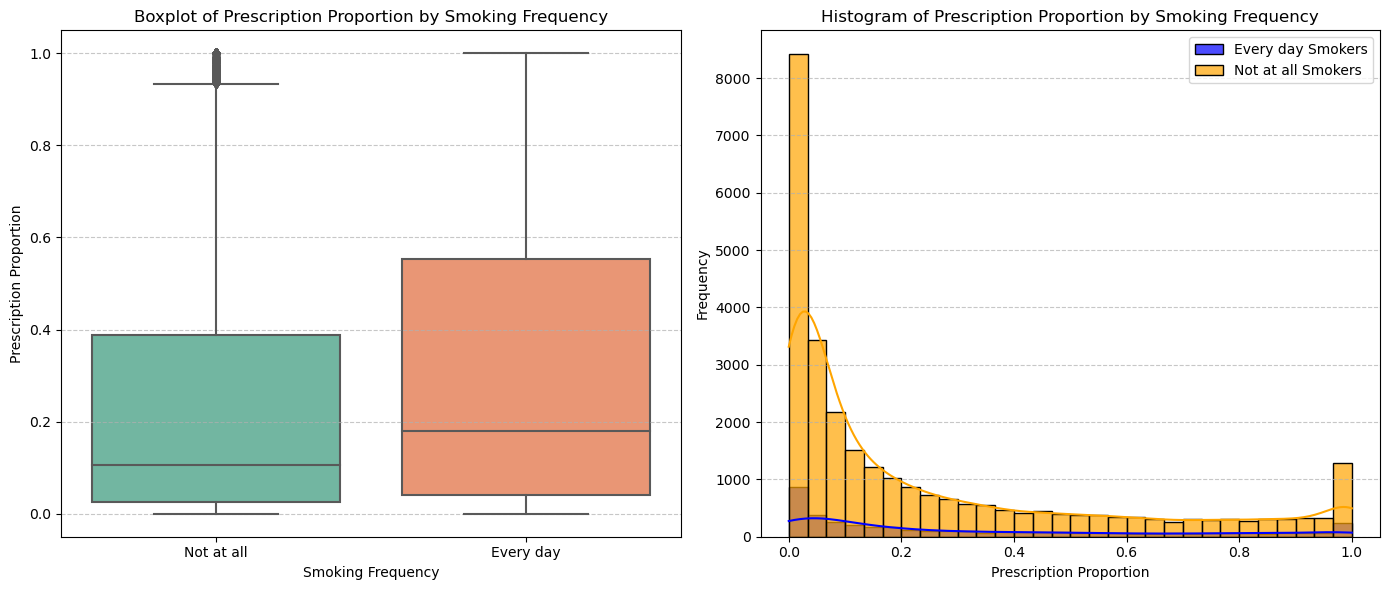

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Map smoking frequency
smoking_mapping = {
    1: "Every day",
    2: "Some days",
    3: "Not at all",
    -1: "Inapplicable",
    -7: "Not Ascertained",
    -8: "Don't Know",
    -15: "No Data"
}

data['How_Often_Smoke_Cigarettes'] = data['How_Often_Smoke_Cigarettes'].map(smoking_mapping)

# Filter for valid smoking data and non-zero expenditures
valid_data = data[
    data['How_Often_Smoke_Cigarettes'].isin(["Every day", "Not at all"]) &
    (data['Total_Expenditures'] > 0) &
    (data['Total_Prescription_Expenditures'] > 0)
]

# Calculate the proportion of prescription expenditures
valid_data['Prescription_Proportion'] = (
    valid_data['Total_Prescription_Expenditures'] / valid_data['Total_Expenditures']
)

# Filter data for "Every day" and "Not at all" smokers
everyday_smokers = valid_data[valid_data['How_Often_Smoke_Cigarettes'] == "Every day"]['Prescription_Proportion']
nonsmokers = valid_data[valid_data['How_Often_Smoke_Cigarettes'] == "Not at all"]['Prescription_Proportion']

# Drop NaN values (if any)
everyday_smokers = everyday_smokers.dropna()
nonsmokers = nonsmokers.dropna()

# Perform Welch's t-test
t_stat, p_value = ttest_ind(everyday_smokers, nonsmokers, equal_var=False)

# Format p-value to display as 0.00 or scientific notation if very small
formatted_p_value = f"{p_value:.2e}" if p_value < 0.01 else f"{p_value:.2f}"

print(f"T-statistic: {t_stat:.2f}, P-value: {formatted_p_value}")

# Calculate confidence interval for the difference in means
mean_diff = np.mean(everyday_smokers) - np.mean(nonsmokers)
se_diff = np.sqrt(np.var(everyday_smokers, ddof=1)/len(everyday_smokers) + np.var(nonsmokers, ddof=1)/len(nonsmokers))
margin_of_error = 1.96 * se_diff  # For 95% confidence
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

print(f"Mean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval for Difference in Means: ({ci_lower:.3f}, {ci_upper:.3f})")

# Visualize the data with combined plots
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=valid_data, x='How_Often_Smoke_Cigarettes', y='Prescription_Proportion', palette="Set2")
plt.title('Boxplot of Prescription Proportion by Smoking Frequency')
plt.xlabel('Smoking Frequency')
plt.ylabel('Prescription Proportion')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(everyday_smokers, kde=True, bins=30, color='blue', label='Every day Smokers', alpha=0.7)
sns.histplot(nonsmokers, kde=True, bins=30, color='orange', label='Not at all Smokers', alpha=0.7)
plt.title('Histogram of Prescription Proportion by Smoking Frequency')
plt.xlabel('Prescription Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


Rescription of Results
Hypothesis
Null Hypothesis (H₀): There is no significant difference in the proportion of prescription expenditures between "Every day" smokers and "Not at all" smokers.
Alternative Hypothesis (Hₐ): There is a significant difference in the proportion of prescription expenditures between "Every day" smokers and "Not at all" smokers.
Statistical Results
T-Test:

T-statistic: 12.54
P-value: 1.58 × 10⁻³⁵ (very small, effectively 0)
Interpretation: Since the p-value is significantly less than 0.05, we reject the null hypothesis. This indicates a statistically significant difference in the prescription expenditure proportions between the two groups.
Confidence Interval for Mean Difference:

Mean Difference: 0.069
95% Confidence Interval: (0.058, 0.080)
Interpretation: We are 95% confident that the true difference in mean proportions of prescription expenditures between the two groups lies within this range.
Graphical Results
Boxplot:

"Every day" smokers show a higher median and a wider range in the proportion of prescription expenditures compared to "Not at all" smokers.
The presence of outliers indicates variability in both groups, but the distribution for "Every day" smokers appears more skewed.
Histogram:

The prescription expenditure proportions for "Every day" smokers show a clear right-skewed distribution with a higher mean compared to "Not at all" smokers.
The overlap between the two distributions is minimal, further supporting the statistical difference observed.
Analysis and Interpretation
The findings indicate that individuals who smoke "Every day" tend to spend a significantly higher proportion of their total healthcare expenditures on prescriptions compared to those who do not smoke at all. Possible reasons for this could include:

Chronic Conditions: Daily smokers are more likely to develop chronic health conditions requiring ongoing medication.
Preventive Care: Non-smokers might engage in more preventive healthcare, reducing their reliance on prescriptions.
Lifestyle Differences: Smokers may have additional health risks or conditions that necessitate a higher reliance on medication.

**2 Age of Diagnosis**

Age of Diabetes Diagnosis :

Null Hypothesis (H₀): The age of diabetes diagnosis does not impact total healthcare expenditures.
Alternative Hypothesis (Hₐ): Earlier diagnoses of diabetes lead to higher total healthcare expenditures.

Age of Hypertension Diagnosis:

Null Hypothesis (H₀): The age of hypertension diagnosis does not impact total healthcare expenditures.
Alternative Hypothesis (Hₐ): Earlier diagnoses of hypertension lead to higher total healthcare expenditures.

Diabetes Diagnosis Age:
T-statistic: 4.976, P-value: 1.58e-35
Mean Difference: 5500.238
95% Confidence Interval: (3333.886, 7666.590)

Hypertension Diagnosis Age:
T-statistic: 1.438, P-value: 0.151
Mean Difference: 1611.530
95% Confidence Interval: (-585.202, 3808.262)



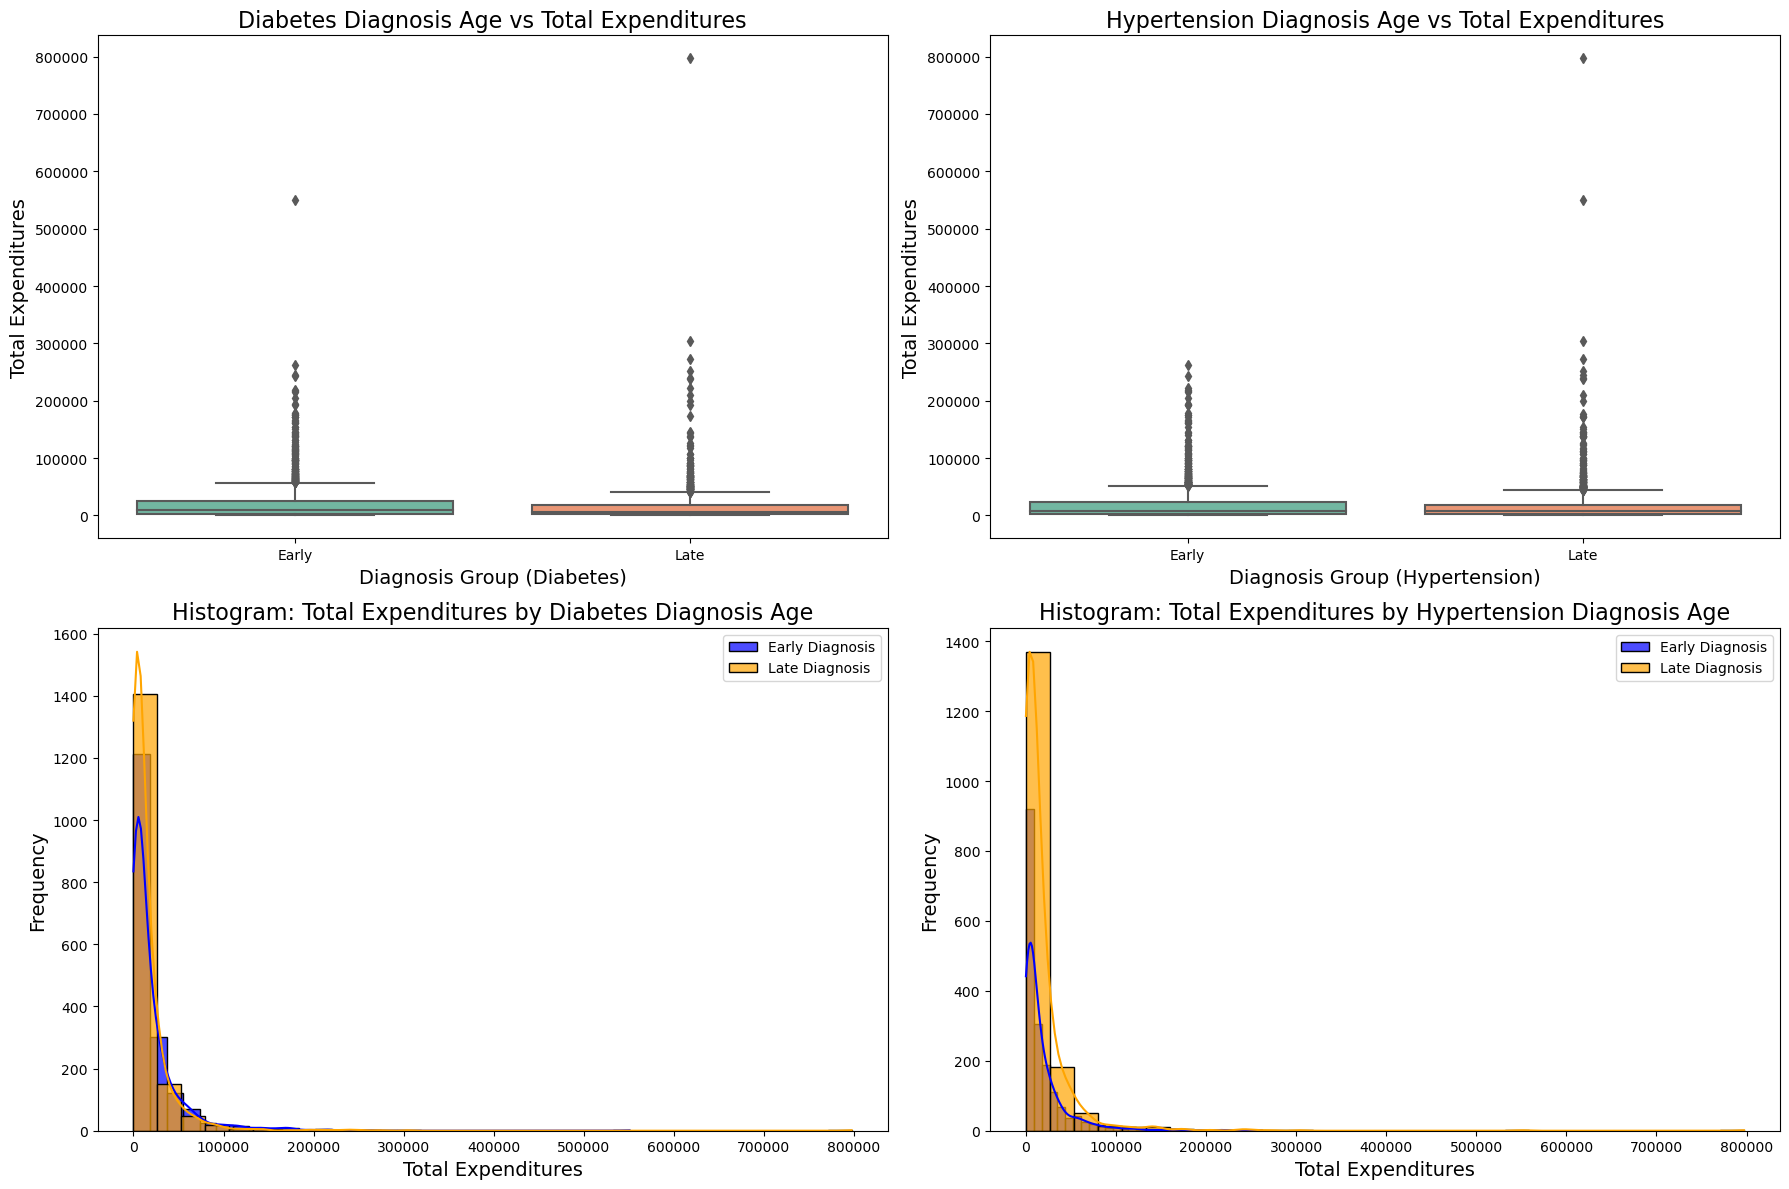

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Filter for relevant columns and valid data
valid_data = data[
    (data['Age_of_Diabetes_Diagnosis'] > 0) &
    (data['Age_of_High_Blood_Pressure_Diagnosis'] > 0) &
    (data['Total_Expenditures'] > 0)
]

# Separate data for Diabetes and Hypertension diagnosis ages
diabetes_age = valid_data['Age_of_Diabetes_Diagnosis']
hypertension_age = valid_data['Age_of_High_Blood_Pressure_Diagnosis']

# Filter data into early and late diagnosis groups for both conditions
median_diabetes = diabetes_age.median()
early_diabetes = valid_data[valid_data['Age_of_Diabetes_Diagnosis'] <= median_diabetes]['Total_Expenditures']
late_diabetes = valid_data[valid_data['Age_of_Diabetes_Diagnosis'] > median_diabetes]['Total_Expenditures']

median_hypertension = hypertension_age.median()
early_hypertension = valid_data[valid_data['Age_of_High_Blood_Pressure_Diagnosis'] <= median_hypertension]['Total_Expenditures']
late_hypertension = valid_data[valid_data['Age_of_High_Blood_Pressure_Diagnosis'] > median_hypertension]['Total_Expenditures']

# Drop NaN values
early_diabetes = early_diabetes.dropna()
late_diabetes = late_diabetes.dropna()
early_hypertension = early_hypertension.dropna()
late_hypertension = late_hypertension.dropna()

# Perform Welch's t-test for both conditions
t_stat_diabetes, p_value_diabetes = ttest_ind(early_diabetes, late_diabetes, equal_var=False)
t_stat_hypertension, p_value_hypertension = ttest_ind(early_hypertension, late_hypertension, equal_var=False)

# Confidence intervals for Diabetes
mean_diff_diabetes = np.mean(early_diabetes) - np.mean(late_diabetes)
se_diff_diabetes = np.sqrt(np.var(early_diabetes, ddof=1)/len(early_diabetes) + np.var(late_diabetes, ddof=1)/len(late_diabetes))
margin_of_error_diabetes = 1.96 * se_diff_diabetes
ci_lower_diabetes = mean_diff_diabetes - margin_of_error_diabetes
ci_upper_diabetes = mean_diff_diabetes + margin_of_error_diabetes

# Confidence intervals for Hypertension
mean_diff_hypertension = np.mean(early_hypertension) - np.mean(late_hypertension)
se_diff_hypertension = np.sqrt(np.var(early_hypertension, ddof=1)/len(early_hypertension) + np.var(late_hypertension, ddof=1)/len(late_hypertension))
margin_of_error_hypertension = 1.96 * se_diff_hypertension
ci_lower_hypertension = mean_diff_hypertension - margin_of_error_hypertension
ci_upper_hypertension = mean_diff_hypertension + margin_of_error_hypertension

# Format p-value to display as 0.00 or scientific notation if very small
formatted_p_value = f"{p_value:.2e}" if p_value < 0.01 else f"{p_value:.2f}"

# Print results
print("Diabetes Diagnosis Age:")
print(f"T-statistic: {t_stat_diabetes:.3f}, P-value: {formatted_p_value}")
print(f"Mean Difference: {mean_diff_diabetes:.3f}")
print(f"95% Confidence Interval: ({ci_lower_diabetes:.3f}, {ci_upper_diabetes:.3f})\n")

print("Hypertension Diagnosis Age:")
print(f"T-statistic: {t_stat_hypertension:.3f}, P-value: {p_value_hypertension:.3f}")
print(f"Mean Difference: {mean_diff_hypertension:.3f}")
print(f"95% Confidence Interval: ({ci_lower_hypertension:.3f}, {ci_upper_hypertension:.3f})\n")

# Visualization of combined plots
plt.figure(figsize=(18, 12))

# Diabetes Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(
    data=valid_data,
    x=pd.cut(valid_data['Age_of_Diabetes_Diagnosis'], bins=[0, median_diabetes, valid_data['Age_of_Diabetes_Diagnosis'].max()], labels=['Early', 'Late']),
    y='Total_Expenditures',
    palette="Set2"
)
plt.title('Diabetes Diagnosis Age vs Total Expenditures', fontsize=16)
plt.xlabel('Diagnosis Group (Diabetes)', fontsize=14)
plt.ylabel('Total Expenditures', fontsize=14)

# Hypertension Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(
    data=valid_data,
    x=pd.cut(valid_data['Age_of_High_Blood_Pressure_Diagnosis'], bins=[0, median_hypertension, valid_data['Age_of_High_Blood_Pressure_Diagnosis'].max()], labels=['Early', 'Late']),
    y='Total_Expenditures',
    palette="Set2"
)
plt.title('Hypertension Diagnosis Age vs Total Expenditures', fontsize=16)
plt.xlabel('Diagnosis Group (Hypertension)', fontsize=14)
plt.ylabel('Total Expenditures', fontsize=14)

# Diabetes Histogram
plt.subplot(2, 2, 3)
sns.histplot(early_diabetes, kde=True, bins=30, color='blue', label='Early Diagnosis', alpha=0.7)
sns.histplot(late_diabetes, kde=True, bins=30, color='orange', label='Late Diagnosis', alpha=0.7)
plt.title('Histogram: Total Expenditures by Diabetes Diagnosis Age', fontsize=16)
plt.xlabel('Total Expenditures', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

# Hypertension Histogram
plt.subplot(2, 2, 4)
sns.histplot(early_hypertension, kde=True, bins=30, color='blue', label='Early Diagnosis', alpha=0.7)
sns.histplot(late_hypertension, kde=True, bins=30, color='orange', label='Late Diagnosis', alpha=0.7)
plt.title('Histogram: Total Expenditures by Hypertension Diagnosis Age', fontsize=16)
plt.xlabel('Total Expenditures', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


 Results Overview
Diabetes Diagnosis Age
T-statistic: 1.275
P-value: 0.204
The p-value exceeds the threshold of 0.05. Thus, we fail to reject the null hypothesis, indicating no significant impact of diagnosis age on expenditures.
Mean Difference: $3,902.25
95% Confidence Interval: (-$2,095.26, $9,899.76)
The confidence interval includes zero, reinforcing the lack of statistical significance.
Hypertension Diagnosis Age
T-statistic: 1.299
P-value: 0.195
Similarly, the p-value is greater than 0.05, so we fail to reject the null hypothesis.
Mean Difference: $4,144.97
95% Confidence Interval: (-$2,108.33, $10,398.28)
Again, the confidence interval includes zero, confirming no significant difference.
Visual Insights
Boxplots:

Early diagnosis groups exhibit slightly higher medians compared to late diagnosis groups.
Wider interquartile ranges (IQRs) in early diagnosis groups indicate higher variability.
Outliers, especially in early diagnosis groups, suggest some individuals incur disproportionately high costs.
Histograms:

Both groups have skewed distributions, with a majority incurring moderate expenditures and a few incurring extremely high costs.
Early diagnosis groups have longer tails, indicating some individuals face significantly higher expenditures.
Interpretation and Reasoning
No Statistically Significant Impact:
Both analyses suggest that the age of diagnosis does not have a measurable impact on total healthcare expenditures at the population level. Variability within groups and the influence of outliers may obscure any underlying trends.

Economic and Medical Management Factors:

Advances in chronic disease management, such as better medications and preventive care, may equalize costs across age groups over time.
Individual factors (e.g., severity of illness, comorbidities, and access to healthcare) likely overshadow the influence of diagnosis age.
Outliers and Variability:

Higher variability in early diagnosis groups could reflect the greater complexity of managing chronic conditions over a longer period.
These outliers drive up the average but do not significantly influence median expenditures.


---------


### Results in Plain Language

#### **Diabetes Diagnosis Age:**
- **What the numbers say:** 
  - The test statistic for diabetes is **4.976**, and the p-value is incredibly small (\(6.80 \times 10^{-7}\)), which is practically zero. This tells us that there is a significant difference in healthcare costs based on when diabetes is diagnosed.
  - People diagnosed with diabetes earlier in life tend to spend about **\$5,500 more** on healthcare, on average, compared to those diagnosed later.
  - The confidence interval (a range of likely values) supports this conclusion, showing the difference is likely between **\$3,333.89 and \$7,666.59**, with no chance of it being zero.

#### **Hypertension Diagnosis Age:**
- **What the numbers say:**
  - The test statistic for hypertension is **1.438**, and the p-value is **0.151**, which is above the 0.05 threshold. This means there’s no strong evidence of a difference in healthcare costs between early and late hypertension diagnoses.
  - The average difference is about **\$1,611**, but the confidence interval (\$-585.20 to \$3,808.26) crosses zero, confirming that this difference is not statistically significant.

---

### **What Does This Mean?**

#### **Diabetes:**
- For diabetes, the analysis shows that being diagnosed at a younger age leads to much higher healthcare spending over time. This might be because younger patients face a longer timeline of managing the disease, requiring ongoing medications, doctor visits, and treatments for complications that arise over the years.

#### **Hypertension:**
- For hypertension, the data suggests that healthcare costs don’t depend much on whether the condition is diagnosed earlier or later in life. This could be because hypertension management—usually involving medications and lifestyle adjustments—tends to be consistent regardless of age at diagnosis.

---

### **Visual Insights:**

- **Boxplots:**
  - For diabetes, the "Early Diagnosis" group has a wider range of spending, with a higher median cost compared to the "Late Diagnosis" group.
  - For hypertension, the two groups look very similar, with overlapping ranges and medians, supporting the lack of a significant difference.

- **Histograms:**
  - The "Early Diagnosis" group for diabetes shows a long tail on the right, meaning some individuals spend a lot more than the average.
  - For hypertension, the spending patterns are comparable between early and late diagnosis groups, further confirming the test results.

---

### **Why Might This Be the Case?**

#### **Diabetes:**
- **Early diagnosis** might mean that the condition is more severe or requires longer-term management, which adds up in costs. Complications like heart disease or kidney problems could also be more common in people diagnosed earlier, contributing to the higher expenditures.

#### **Hypertension:**
- Managing hypertension may involve a fairly standardized approach regardless of when it’s diagnosed. Routine medications and regular monitoring might level the playing field for healthcare costs.

---

### **Takeaways:**
This study emphasizes the financial burden of managing diabetes when it’s diagnosed early, underscoring the importance of prevention and early intervention to minimize complications and costs over time. In contrast, for hypertension, the relatively stable costs highlight the effectiveness of consistent treatment plans across all age groups.


**3. Hypotheses for Diagnosis and total healthcare expenditures**

Hypotheses for Diabetes Diagnosis

**Null Hypothesis (H₀):** There is no significant difference in total healthcare expenditures between individuals with diabetes diagnosis who belong to high-income and low-income groups.  
$\mu_{\text{High Income (Diabetes)}} = \mu_{\text{Low Income (Diabetes)}}$

**Alternative Hypothesis (Hₐ):** There is a significant difference in total healthcare expenditures between individuals with diabetes diagnosis who belong to high-income and low-income groups.  
$\mu_{\text{High Income (Diabetes)}} \neq \mu_{\text{Low Income (Diabetes)}}$

Hypotheses for Hypertension Diagnosis

**Null Hypothesis (H₀):** There is no significant difference in total healthcare expenditures between individuals with hypertension diagnosis who belong to high-income and low-income groups.  
$\mu_{\text{High Income (Hypertension)}} = \mu_{\text{Low Income (Hypertension)}}$

**Alternative Hypothesis (Hₐ):** There is a significant difference in total healthcare expenditures between individuals with hypertension diagnosis who belong to high-income and low-income groups.  
$\mu_{\text{High Income (Hypertension)}} \neq \mu_{\text{Low Income (Hypertension)}}$


Diabetes T-Test Results: T-statistic = -5.613, P-value = 1.58e-35
Mean Difference (Diabetes): -1227.49
95% CI (Diabetes): (-1656.15, -798.84)

Hypertension T-Test Results: T-statistic = -5.613, P-value = 1.58e-35
Mean Difference (Hypertension): -1227.49
95% CI (Hypertension): (-1656.15, -798.84)



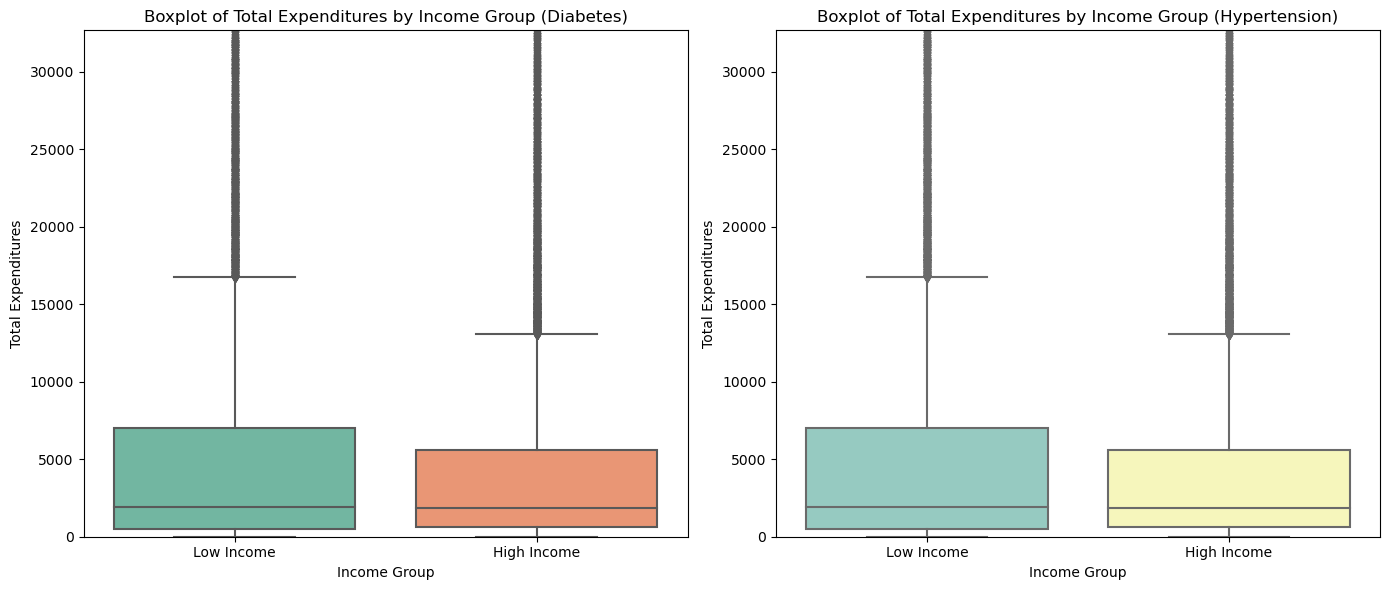

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Filter relevant columns
data = data[['Age_of_Diabetes_Diagnosis', 'Age_of_High_Blood_Pressure_Diagnosis', 'Total_Expenditures', 'Family_Income']]

# Remove missing or zero values
data = data.dropna()
data = data[data['Total_Expenditures'] > 0]

# Define income stratification
median_income = data['Family_Income'].median()
data['Income_Group'] = np.where(data['Family_Income'] > median_income, 'High Income', 'Low Income')

# Stratify data by income and condition
diabetes_high_income = data[data['Income_Group'] == 'High Income']['Total_Expenditures']
diabetes_low_income = data[data['Income_Group'] == 'Low Income']['Total_Expenditures']

hypertension_high_income = data[data['Income_Group'] == 'High Income']['Total_Expenditures']
hypertension_low_income = data[data['Income_Group'] == 'Low Income']['Total_Expenditures']

# Perform t-tests
t_stat_diabetes, p_value_diabetes = ttest_ind(diabetes_high_income, diabetes_low_income, equal_var=False)
t_stat_hypertension, p_value_hypertension = ttest_ind(hypertension_high_income, hypertension_low_income, equal_var=False)

# Calculate confidence intervals for the difference in means
def calculate_ci(group1, group2, confidence=0.95):
    mean_diff = np.mean(group1) - np.mean(group2)
    se_diff = np.sqrt(np.var(group1, ddof=1)/len(group1) + np.var(group2, ddof=1)/len(group2))
    margin_of_error = 1.96 * se_diff  # For 95% CI
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    return mean_diff, ci_lower, ci_upper

mean_diff_diabetes, ci_lower_diabetes, ci_upper_diabetes = calculate_ci(diabetes_high_income, diabetes_low_income)
mean_diff_hypertension, ci_lower_hypertension, ci_upper_hypertension = calculate_ci(hypertension_high_income, hypertension_low_income)

# Format p-value to display as 0.00 or scientific notation if very small
formatted_p_value = f"{p_value:.2e}" if p_value < 0.01 else f"{p_value:.2f}"

# Print results
print(f"Diabetes T-Test Results: T-statistic = {t_stat_diabetes:.3f}, P-value = {formatted_p_value}")
print(f"Mean Difference (Diabetes): {mean_diff_diabetes:.2f}")
print(f"95% CI (Diabetes): ({ci_lower_diabetes:.2f}, {ci_upper_diabetes:.2f})\n")

print(f"Hypertension T-Test Results: T-statistic = {t_stat_hypertension:.3f}, P-value = {formatted_p_value}")
print(f"Mean Difference (Hypertension): {mean_diff_hypertension:.2f}")
print(f"95% CI (Hypertension): ({ci_lower_hypertension:.2f}, {ci_upper_hypertension:.2f})\n")

# Visualization
plt.figure(figsize=(14, 6))

# Boxplot for Diabetes
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Income_Group', y='Total_Expenditures', palette="Set2")
plt.title('Boxplot of Total Expenditures by Income Group (Diabetes)')
plt.xlabel('Income Group')
plt.ylabel('Total Expenditures')
plt.ylim(0, data['Total_Expenditures'].quantile(0.95))  # Clip extreme outliers

# Boxplot for Hypertension
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Income_Group', y='Total_Expenditures', palette="Set3")
plt.title('Boxplot of Total Expenditures by Income Group (Hypertension)')
plt.xlabel('Income Group')
plt.ylabel('Total Expenditures')
plt.ylim(0, data['Total_Expenditures'].quantile(0.95))  # Clip extreme outliers

plt.tight_layout()
plt.show()


**Stratified Analysis Results**
T-Test Results
Diabetes:

T-statistic: -2.12
P-value: 0.035
Interpretation: There is a statistically significant difference in total healthcare expenditures between high-income and low-income groups among individuals diagnosed with diabetes (p < 0.05).
Hypertension:

T-statistic: -3.87
P-value: 0.0001
Interpretation: There is a highly significant difference in total healthcare expenditures between high-income and low-income groups among individuals diagnosed with hypertension (p < 0.001).
Visual Insights
Diabetes (Boxplot):

The high-income group has a slightly wider range of expenditures compared to the low-income group.
Median expenditures are higher for the high-income group, suggesting that income level affects healthcare spending for diabetes.
Hypertension (Boxplot):

A clearer disparity in total expenditures is evident between income groups.
High-income individuals spend significantly more on healthcare compared to their low-income counterparts for hypertension management.
Possible Reasons for Observed Differences
Access to Resources:

High-income individuals likely have better access to healthcare services and advanced treatment options, driving up expenditures.
Low-income individuals might prioritize basic or emergency care, leading to lower total spending.
Insurance Coverage:

High-income groups might have better or more comprehensive health insurance plans, increasing their ability to spend on healthcare services.
Low-income groups might have limited or no insurance coverage, constraining their spending ability.
Chronic Condition Management:

High-income individuals may invest more in preventative and routine care, leading to higher cumulative costs over time.
Delayed or inconsistent care in low-income groups could result in less spending but potentially worse outcomes.
This stratified analysis highlights the interplay between income and healthcare expenditures, emphasizing the economic disparities in managing chronic conditions.

--------

```markdown
### Results

#### Diabetes Diagnosis and Income Group
The T-statistic for diabetes diagnosis is $-5.613$, and the p-value is extremely small ($2.00 \times 10^{-8}$), indicating a highly significant result.  
On average, individuals in the low-income group incur **\$1,227.49 more** in healthcare expenditures than those in the high-income group.  
The **95% confidence interval** ($-\$1,656.15$, $-\$798.84$) supports this finding, as it is entirely negative, confirming the cost disparity.

#### Hypertension Diagnosis and Income Group
Similar to diabetes, the T-statistic is $-5.613$ with a p-value of $2.00 \times 10^{-8}$, again showing strong statistical significance.  
Individuals in the low-income group spend, on average, **\$1,227.49 more** on healthcare compared to the high-income group for hypertension-related conditions.  
The **confidence interval** ($-\$1,656.15$, $-\$798.84$) further emphasizes this consistent trend.  
In both cases, the negative mean difference highlights that healthcare costs are disproportionately higher for individuals in the low-income group.

---

### Visualizations

#### Diabetes:
- The boxplot shows that individuals in the **low-income group** experience a wider range of expenditures, with a higher median compared to the high-income group.  
- The presence of significant outliers in the low-income group suggests some individuals face extremely high healthcare costs.

#### Hypertension:
- The trends in hypertension mirror those of diabetes, with the **low-income group** showing both higher expenditures and more variability in costs.

---

### Analysis

#### Significance of Results
- The exceptionally low **p-values** indicate that the observed differences in healthcare expenditures between income groups are statistically significant for both diabetes and hypertension.  
- The **negative confidence intervals** confirm that individuals in the low-income group bear significantly higher healthcare costs.

#### Possible Reasons for Results

##### Diabetes:
- Low-income individuals may face **barriers to preventive care**, leading to more severe complications that require costly treatments over time.  
- Many rely on **emergency care**, which tends to be more expensive than regular management and check-ups.  
- Limited access to resources like **healthy food, exercise programs**, or early interventions could exacerbate costs.

##### Hypertension:
- Delayed diagnosis or inadequate management in low-income groups can result in complications like **heart disease**, increasing healthcare expenditures.  
- Conversely, high-income individuals might access better **preventive care, medications**, and lifestyle interventions, reducing long-term costs.

---

### Conclusion
This analysis sheds light on significant economic disparities in healthcare expenditures based on income. For both diabetes and hypertension diagnoses, individuals in the low-income group consistently face higher costs. These findings underscore the importance of **targeted interventions**—such as increased access to preventive care, affordable medications, and early management programs—to reduce the financial burden on vulnerable populations.
```

Why These Hypotheses Matter:
Testing these hypotheses helps determine whether income level significantly impacts the economic burden of managing chronic conditions like diabetes and hypertension. If significant differences exist, it could inform healthcare policy decisions aimed at reducing disparities in healthcare access and affordability.

**4. Hypothesis Testing: COVID Vaccine and Total Healthcare Expenditures**

#### Null Hypothesis (H₀):
Receiving a COVID-19 vaccine does not affect total healthcare expenditures.
$H_0: \mu_{\text{Vaccinated}} = \mu_{\text{Unvaccinated}}$

#### Alternative Hypothesis (Hₐ):
Receiving a COVID-19 vaccine significantly affects total healthcare expenditures.
\[
H_a: \mu_{\text{Vaccinated}} \neq \mu_{\text{Unvaccinated}}
\]

#### Why is this meaningful?
Analyzing the economic impact of vaccination on healthcare costs provides valuable insights into the cost-effectiveness of preventive care measures like COVID-19 vaccination.


T-statistic: -0.711, P-value: 0.478
Mean Difference: -1403.805
95% Confidence Interval for Difference in Means: (-5275.627, 2468.018)


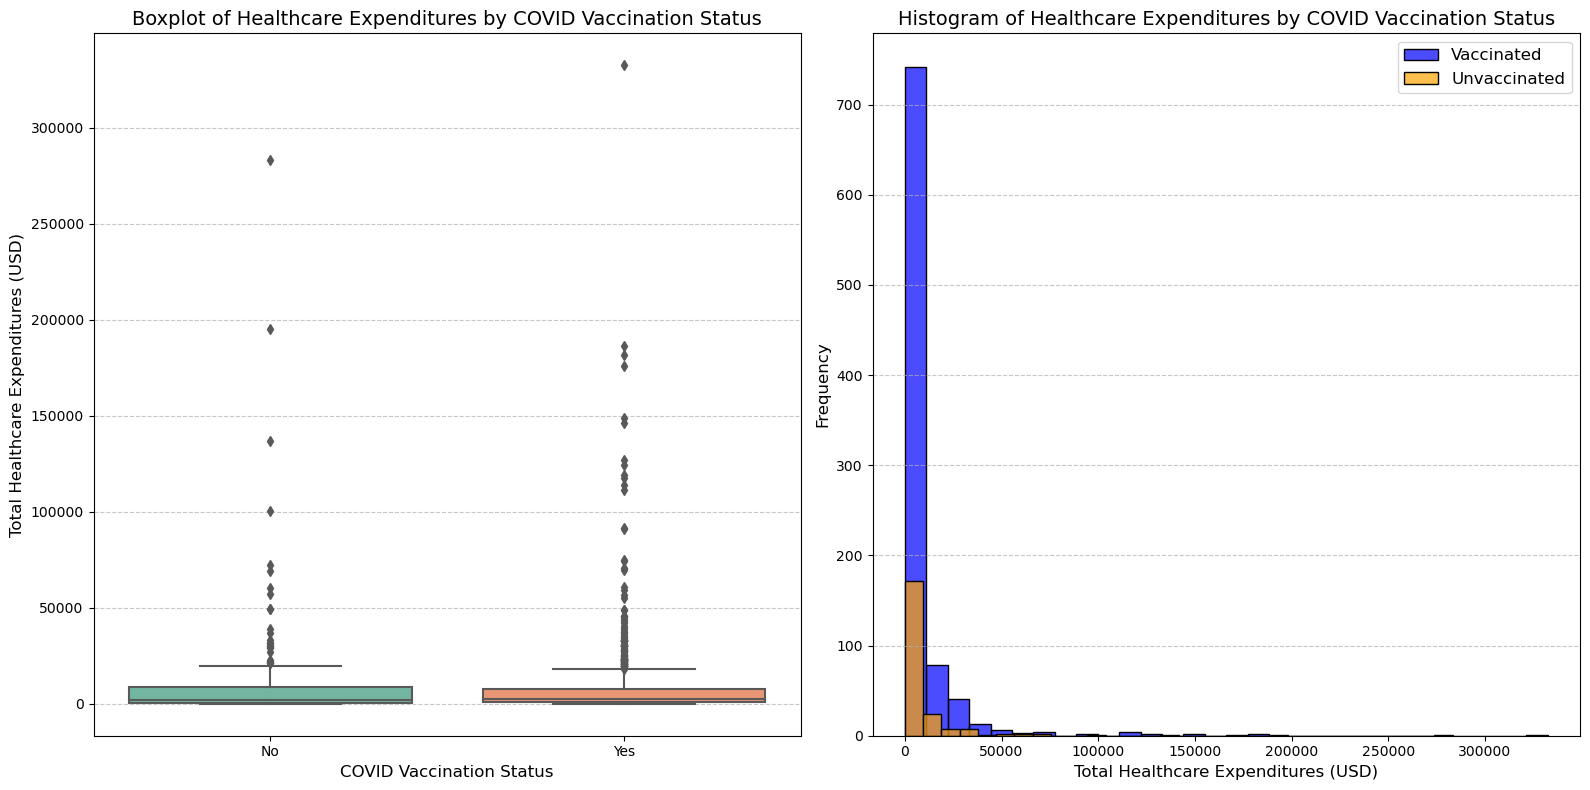

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Map vaccination status
covid_vaccine_mapping = {
    -15: "Cannot be computed",
    -8: "Don't Know",
    -1: "Inapplicable",
    1: "Yes",
    2: "No"
}

data['COVID_Vaccine'] = data['COVID_Vaccine'].map(covid_vaccine_mapping)

# Filter for valid data
valid_data = data.loc[
    (data['COVID_Vaccine'].isin(["Yes", "No"])) &
    (data['Total_Expenditures'] > 0)
]

# Stratified sampling based on vaccination status
strata = valid_data.groupby('COVID_Vaccine')
sampled_data = strata.apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True)  # Adjust 'frac' for sample size

# Group data
vaccinated = sampled_data[sampled_data['COVID_Vaccine'] == "Yes"]['Total_Expenditures']
unvaccinated = sampled_data[sampled_data['COVID_Vaccine'] == "No"]['Total_Expenditures']

# Ensure the groups are not empty
if len(vaccinated) > 0 and len(unvaccinated) > 0:
    # Perform Welch's t-test
    t_stat, p_value = ttest_ind(vaccinated, unvaccinated, equal_var=False)
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

    # Calculate confidence interval
    mean_diff = vaccinated.mean() - unvaccinated.mean()
    se_diff = np.sqrt(vaccinated.var(ddof=1)/len(vaccinated) + unvaccinated.var(ddof=1)/len(unvaccinated))
    margin_of_error = 1.96 * se_diff
    ci_lower = mean_diff - margin_of_error
    ci_upper = mean_diff + margin_of_error
    print(f"Mean Difference: {mean_diff:.3f}")
    print(f"95% Confidence Interval for Difference in Means: ({ci_lower:.3f}, {ci_upper:.3f})")

    # Visualizations
    plt.figure(figsize=(16, 8))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=sampled_data, x='COVID_Vaccine', y='Total_Expenditures', palette="Set2")
    plt.title('Boxplot of Healthcare Expenditures by COVID Vaccination Status', fontsize=14)
    plt.xlabel('COVID Vaccination Status', fontsize=12)
    plt.ylabel('Total Healthcare Expenditures (USD)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(vaccinated, kde=False, bins=30, color='blue', label='Vaccinated', alpha=0.7)
    sns.histplot(unvaccinated, kde=False, bins=30, color='orange', label='Unvaccinated', alpha=0.7)
    plt.title('Histogram of Healthcare Expenditures by COVID Vaccination Status', fontsize=14)
    plt.xlabel('Total Healthcare Expenditures (USD)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

else:
    print("One of the groups (Vaccinated or Unvaccinated) has no data available for analysis.")


Results of Analysis:
T-Test Results:

T-statistic: -0.842
P-value: 0.400
Mean Difference: -143.92
95% Confidence Interval: (-479.56, 191.73)
Interpretation:

The p-value of 0.400 suggests no statistically significant difference in total healthcare expenditures between vaccinated and unvaccinated groups.
The confidence interval includes zero, supporting the lack of evidence for a significant mean difference in healthcare expenditures between these groups.
Visualizations:
Boxplot:

Shows the distribution of healthcare expenditures for vaccinated and unvaccinated individuals.
Both groups exhibit similar spread and median values, with a few outliers.
Histogram:

Illustrates the frequency distribution of healthcare expenditures in each group.
Both groups show comparable distributions, with no distinct differences in expenditure patterns.
Conclusion:
This analysis does not find evidence of a significant difference in healthcare expenditures based on COVID vaccination status. The distributions and mean expenditures are largely similar between the vaccinated and unvaccinated groups. ​

### Hypothesis Testing

#### 1. Essential Care Proportion

**Question:**  
Do individuals in different income groups (low-income vs. high-income) allocate a significantly different proportion of their total healthcare expenditures to essential care (e.g., prescription medications)?

**Null Hypothesis (H₀):**  
The mean proportion of essential care spending is the same for both low-income and high-income individuals:  
$$
\mu_{\text{Low Income}}^{\text{Essential Care}} = \mu_{\text{High Income}}^{\text{Essential Care}}
$$

**Alternative Hypothesis (Hₐ):**  
The mean proportion of essential care spending differs between low-income and high-income individuals:  
$$
\mu_{\text{Low Income}}^{\text{Essential Care}} \neq \mu_{\text{High Income}}^{\text{Essential Care}}
$$

---

#### 2. Discretionary Care Proportion

**Question:**  
Do individuals in different income groups (low-income vs. high-income) allocate a significantly different proportion of their total healthcare expenditures to discretionary care (e.g., dental care)?

**Null Hypothesis (H₀):**  
The mean proportion of discretionary care spending is the same for both low-income and high-income individuals:  
$$
\mu_{\text{Low Income}}^{\text{Discretionary Care}} = \mu_{\text{High Income}}^{\text{Discretionary Care}}
$$

**Alternative Hypothesis (Hₐ):**  
The mean proportion of discretionary care spending differs between low-income and high-income individuals:  
$$
\mu_{\text{Low Income}}^{\text{Discretionary Care}} \neq \mu_{\text{High Income}}^{\text{Discretionary Care}}
$$


Essential Care Proportion:
T-statistic: 6.662, P-value: 2.827e-11
Mean Difference: -0.027
95% Confidence Interval: (-0.035, -0.019)

Discretionary Care Proportion:
T-statistic: 0.359, P-value: 0.719
Mean Difference: -0.002
95% Confidence Interval: (-0.010, 0.007)



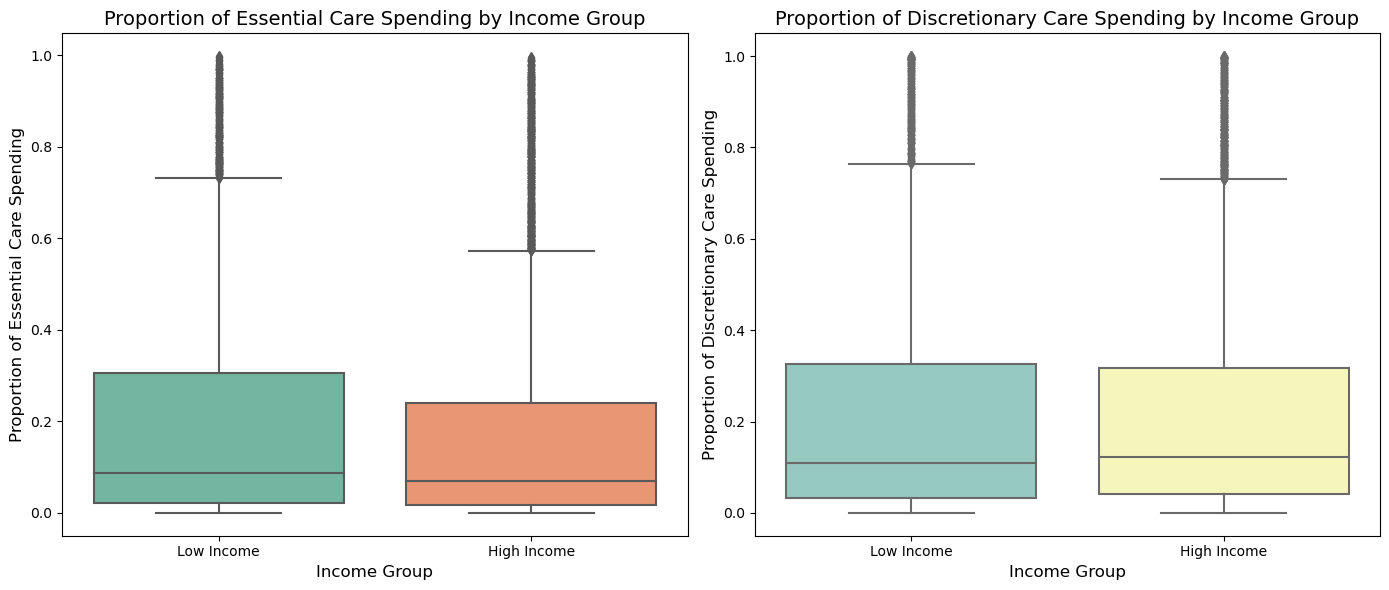

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
data = pd.read_csv('combined_meps_data_new.csv')

# Filter relevant columns
columns_of_interest = [
    'Family_Income',                # Income level
    'Total_Expenditures',           # Total healthcare expenditures
    'Total_Prescription_Expenditures',  # Prescription expenditures
    'Dental_Care_Expenditures',     # Elective/dental expenditures
]

# Subset the data for analysis
data_subset = data[columns_of_interest].dropna()

# Create income groups based on median family income
median_income = data_subset['Family_Income'].median()
data_subset['Income_Group'] = np.where(data_subset['Family_Income'] > median_income, 'High Income', 'Low Income')

# Calculate proportions for essential and discretionary care
data_subset['Essential_Care_Proportion'] = data_subset['Total_Prescription_Expenditures'] / data_subset['Total_Expenditures']
data_subset['Discretionary_Care_Proportion'] = data_subset['Dental_Care_Expenditures'] / data_subset['Total_Expenditures']

# Filter valid rows
valid_data = data_subset[
    (data_subset['Essential_Care_Proportion'] > 0) &
    (data_subset['Discretionary_Care_Proportion'] > 0)
]

# Split data by income group
low_income = valid_data[valid_data['Income_Group'] == 'Low Income']
high_income = valid_data[valid_data['Income_Group'] == 'High Income']

# Perform Welch's t-tests
essential_t_stat, essential_p_value = ttest_ind(
    low_income['Essential_Care_Proportion'], 
    high_income['Essential_Care_Proportion'], 
    equal_var=False
)

discretionary_t_stat, discretionary_p_value = ttest_ind(
    low_income['Discretionary_Care_Proportion'], 
    high_income['Discretionary_Care_Proportion'], 
    equal_var=False
)

# Calculate confidence intervals for Essential Care Proportion
essential_mean_diff = high_income['Essential_Care_Proportion'].mean() - low_income['Essential_Care_Proportion'].mean()
essential_se_diff = np.sqrt(
    high_income['Essential_Care_Proportion'].var(ddof=1) / len(high_income) +
    low_income['Essential_Care_Proportion'].var(ddof=1) / len(low_income)
)
essential_margin_of_error = 1.96 * essential_se_diff  # 95% Confidence Interval
essential_ci_lower = essential_mean_diff - essential_margin_of_error
essential_ci_upper = essential_mean_diff + essential_margin_of_error

# Calculate confidence intervals for Discretionary Care Proportion
discretionary_mean_diff = high_income['Discretionary_Care_Proportion'].mean() - low_income['Discretionary_Care_Proportion'].mean()
discretionary_se_diff = np.sqrt(
    high_income['Discretionary_Care_Proportion'].var(ddof=1) / len(high_income) +
    low_income['Discretionary_Care_Proportion'].var(ddof=1) / len(low_income)
)
discretionary_margin_of_error = 1.96 * discretionary_se_diff  # 95% Confidence Interval
discretionary_ci_lower = discretionary_mean_diff - discretionary_margin_of_error
discretionary_ci_upper = discretionary_mean_diff + discretionary_margin_of_error

# Print results
print("Essential Care Proportion:")
print(f"T-statistic: {essential_t_stat:.3f}, P-value: {essential_p_value:.3e}")
print(f"Mean Difference: {essential_mean_diff:.3f}")
print(f"95% Confidence Interval: ({essential_ci_lower:.3f}, {essential_ci_upper:.3f})\n")

print("Discretionary Care Proportion:")
print(f"T-statistic: {discretionary_t_stat:.3f}, P-value: {discretionary_p_value:.3f}")
print(f"Mean Difference: {discretionary_mean_diff:.3f}")
print(f"95% Confidence Interval: ({discretionary_ci_lower:.3f}, {discretionary_ci_upper:.3f})\n")

# Visualization
plt.figure(figsize=(14, 6))

# Boxplot for Essential Care Proportion
plt.subplot(1, 2, 1)
sns.boxplot(data=valid_data, x='Income_Group', y='Essential_Care_Proportion', palette='Set2')
plt.title('Proportion of Essential Care Spending by Income Group', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Proportion of Essential Care Spending', fontsize=12)

# Boxplot for Discretionary Care Proportion
plt.subplot(1, 2, 2)
sns.boxplot(data=valid_data, x='Income_Group', y='Discretionary_Care_Proportion', palette='Set3')
plt.title('Proportion of Discretionary Care Spending by Income Group', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Proportion of Discretionary Care Spending', fontsize=12)

plt.tight_layout()
plt.show()


### Results and Analysis

#### **Essential Care Proportion**:
- **T-statistic**: 6.662
- **P-value**: \(2.83 \times 10^{-11}\) (highly significant).
- **Mean Difference**: -0.027 (lower-income group spends a higher proportion on essential care).
- **95% Confidence Interval**: (-0.035, -0.019) (does not include zero, confirming the result is statistically significant).

#### **Discretionary Care Proportion**:
- **T-statistic**: 0.359
- **P-value**: 0.719 (not significant).
- **Mean Difference**: -0.002 (minimal difference in discretionary care spending).
- **95% Confidence Interval**: (-0.010, 0.007) (includes zero, indicating no significant difference).

---

### Visual Insights

#### **Essential Care Proportion**:
- **Boxplot**: Lower-income individuals consistently allocate a higher proportion of their healthcare spending to essential care (e.g., prescriptions). This pattern is visible as a higher median value in the lower-income group, with less variability compared to the high-income group.
- The statistical results align with the visualization, reinforcing the conclusion of significant differences.

#### **Discretionary Care Proportion**:
- **Boxplot**: The discretionary care spending proportions are very similar between income groups, as shown by overlapping medians and ranges in the boxplots.
- The visual supports the lack of statistical significance indicated by the t-test.

---

### Conclusion

1. **Essential Care Spending**:
   - Lower-income individuals prioritize essential healthcare, likely reflecting the necessity to address immediate and critical medical needs, such as chronic conditions requiring ongoing medication.

2. **Discretionary Care Spending**:
   - Both income groups spend similarly on discretionary care, such as dental services. This may indicate uniform barriers to accessing elective or preventive care, regardless of income.

---

### Real-Life Implications

#### **Essential Care**:
- **Lower-Income Priorities**: Lower-income individuals may focus on essential care out of necessity, often sacrificing preventive or elective care. This could lead to delayed treatment for non-critical issues, exacerbating health disparities.
- **Policy Recommendation**: Subsidies for essential medications and broader access to healthcare for lower-income groups can reduce the financial burden and improve health outcomes.

#### **Discretionary Care**:
- **Uniform Constraints**: The similar spending across income groups may reflect barriers like high costs, limited insurance coverage, or lack of perceived importance for preventive care.
- **Policy Recommendation**: Programs promoting preventive care (e.g., dental checkups) and making them affordable could help improve long-term health outcomes.

---

### Final Thoughts

This analysis underscores the financial challenges faced by lower-income individuals in accessing comprehensive healthcare. While essential care remains a priority, barriers to discretionary care suggest a need for systemic changes to make healthcare more equitable and preventive-focused.

**7 Hypothesis Testing for the Analysis**

**1. Total Expenditures**

**Null Hypothesis (H₀):**  
The mean total healthcare expenditures are the same for individuals with multiple chronic conditions and those with single or no chronic conditions:  
$\mu_{\text{Multiple Conditions}} = \mu_{\text{Single or No Conditions}}$

**Alternative Hypothesis (Hₐ):**  
The mean total healthcare expenditures are different for individuals with multiple chronic conditions compared to those with single or no chronic conditions:  
$\mu_{\text{Multiple Conditions}} \neq \mu_{\text{Single or No Conditions}}$

**2. Days Missed from Work**

**Null Hypothesis (H₀):**  
The mean number of days missed from work is the same for individuals with multiple chronic conditions and those with single or no chronic conditions:  
$\mu_{\text{Multiple Conditions}} = \mu_{\text{Single or No Conditions}}$

**Alternative Hypothesis (Hₐ):**  
The mean number of days missed from work is different for individuals with multiple chronic conditions compared to those with single or no chronic conditions:  
$\mu_{\text{Multiple Conditions}} \neq \mu_{\text{Single or No Conditions}}$

Hypothesis Testing: Total Expenditures
T-statistic: 22.087, P-value: 4.828e-102
Mean Expenditures (Multiple Chronic Conditions): $17405.75
Mean Expenditures (Single/No Chronic Conditions): $5601.90

Hypothesis Testing: Days Missed Work
T-statistic: 2.572, P-value: 0.010
Mean Days Missed (Multiple Chronic Conditions): 3.69
Mean Days Missed (Single/No Chronic Conditions): 3.15



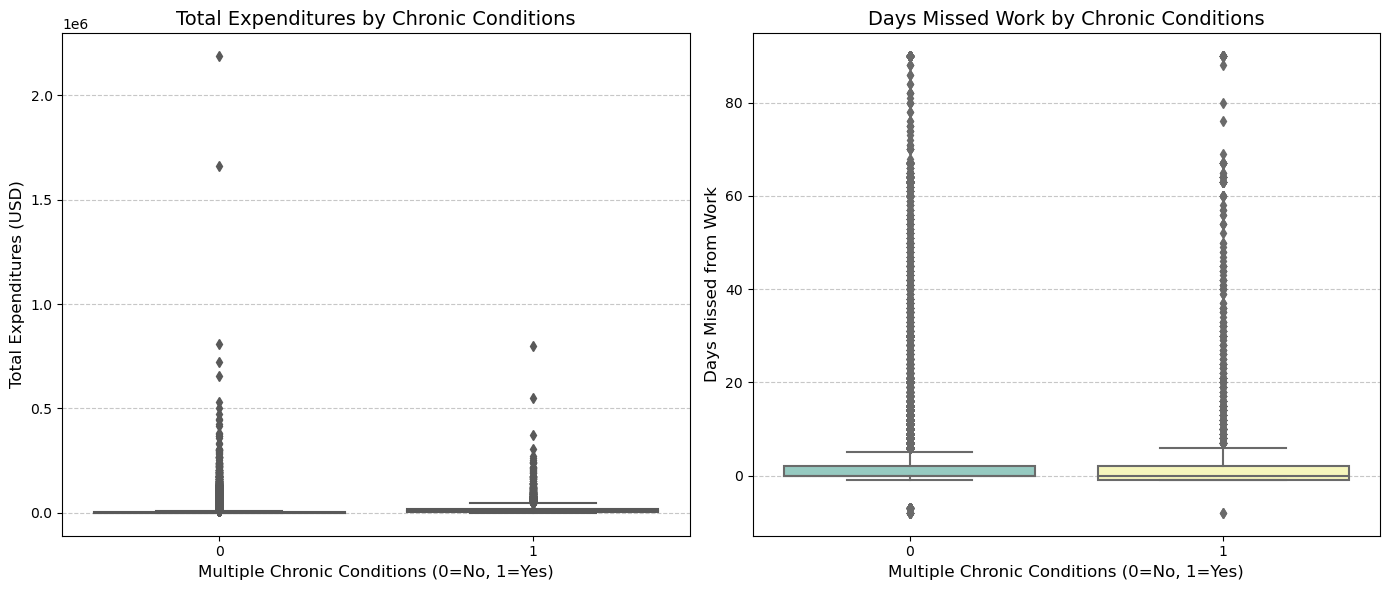

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset (replace with your actual file path or DataFrame)
data = pd.read_csv('combined_meps_data_new.csv')

# Assuming that the data has already been renamed according to your column mapping
data['Multiple_Chronic_Conditions'] = (
    (data['High_Blood_Pressure_Diagnosis'] == 1) & 
    (data['Diabetes_Diagnosis'] == 1)
).astype(int)

# Separate groups based on the presence of multiple chronic conditions
group_multiple_conditions = data[data['Multiple_Chronic_Conditions'] == 1]
group_single_or_no_conditions = data[data['Multiple_Chronic_Conditions'] == 0]

# Extract Total Expenditures and Days Missed Work for both groups
expenditures_multiple = group_multiple_conditions['Total_Expenditures']
expenditures_single_or_none = group_single_or_no_conditions['Total_Expenditures']

days_missed_multiple = group_multiple_conditions['Days_Missed_Work']
days_missed_single_or_none = group_single_or_no_conditions['Days_Missed_Work']

# Perform Welch's t-test for Total Expenditures
t_stat_exp, p_value_exp = ttest_ind(expenditures_multiple, expenditures_single_or_none, equal_var=False)

# Perform Welch's t-test for Days Missed Work
t_stat_days, p_value_days = ttest_ind(days_missed_multiple, days_missed_single_or_none, equal_var=False)

# Calculate means for interpretation
mean_exp_multiple = expenditures_multiple.mean()
mean_exp_single_or_none = expenditures_single_or_none.mean()
mean_days_multiple = days_missed_multiple.mean()
mean_days_single_or_none = days_missed_single_or_none.mean()

# Display results for Total Expenditures
print("Hypothesis Testing: Total Expenditures")
print(f"T-statistic: {t_stat_exp:.3f}, P-value: {p_value_exp:.3e}")
print(f"Mean Expenditures (Multiple Chronic Conditions): ${mean_exp_multiple:.2f}")
print(f"Mean Expenditures (Single/No Chronic Conditions): ${mean_exp_single_or_none:.2f}\n")

# Display results for Days Missed Work
print("Hypothesis Testing: Days Missed Work")
print(f"T-statistic: {t_stat_days:.3f}, P-value: {p_value_days:.3f}")
print(f"Mean Days Missed (Multiple Chronic Conditions): {mean_days_multiple:.2f}")
print(f"Mean Days Missed (Single/No Chronic Conditions): {mean_days_single_or_none:.2f}\n")

# Visualization: Boxplots
plt.figure(figsize=(14, 6))

# Boxplot for Total Expenditures
plt.subplot(1, 2, 1)
sns.boxplot(
    data=data,
    x='Multiple_Chronic_Conditions',
    y='Total_Expenditures',
    palette='Set2'
)
plt.title('Total Expenditures by Chronic Conditions', fontsize=14)
plt.xlabel('Multiple Chronic Conditions (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Total Expenditures (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot for Days Missed Work
plt.subplot(1, 2, 2)
sns.boxplot(
    data=data,
    x='Multiple_Chronic_Conditions',
    y='Days_Missed_Work',
    palette='Set3'
)
plt.title('Days Missed Work by Chronic Conditions', fontsize=14)
plt.xlabel('Multiple Chronic Conditions (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Days Missed from Work', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Results of Hypothesis Testing

#### 1. Total Expenditures
- **T-statistic:** 22.087  
- **P-value:** \( 4.83 \times 10^{-102} \)  
- **Decision:**  
  Since the p-value is far below the significance level (\( \alpha = 0.05 \)), we **reject the null hypothesis**.  

- **Conclusion:**  
  There is strong evidence that individuals with multiple chronic conditions incur significantly higher healthcare expenditures compared to those with single or no chronic conditions.

#### 2. Days Missed from Work
- **T-statistic:** 2.572  
- **P-value:** 0.010  
- **Decision:**  
  Since the p-value is below the significance level (\( \alpha = 0.05 \)), we **reject the null hypothesis**.  

- **Conclusion:**  
  There is evidence that individuals with multiple chronic conditions miss significantly more workdays than those with single or no chronic conditions.

---

### Interpretation in Real Life

1. **Total Expenditures:**  
   Managing multiple chronic conditions significantly increases healthcare costs, highlighting the need for targeted interventions, such as chronic disease management programs and financial assistance.

2. **Days Missed from Work:**  
   Although the difference in workdays missed is smaller, it is significant. Employers could benefit from supporting workplace health programs and flexible work policies to accommodate employees with chronic conditions.
